# Cinemática Directa usando Análisis Geométrico
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/fundamentos-robotica-python/blob/main/4-Cinematica-Directa/4-1-Metodo-Geometrico-Robot2D.ipynb)

Oscar E. Ramos Ponce, Universidad de Ingeniería y Tecnología - UTEC
Fundamentos de Robótica


## Caso 1: Robot R-R (2D)

### 1.&nbsp;Cálculo Simbólico de la Cinemática Directa

Se utilizará sympy para encontrar las matrices de transformación homogéneas y sus productos

In [1]:
import sympy as sp     # Biblioteca para el cálculo simbólico

In [2]:
def sTrasl(x, y, z):
    """ Transformación homogénea que representa traslación pura
    """
    T = sp.Matrix([[1,0,0,x],
                   [0,1,0,y],
                   [0,0,1,z],
                   [0,0,0,1]])
    return T

def sTrotz(ang):
    """ Transformación homogénea que representa rotación alrededor de z
    """
    T = sp.Matrix([[sp.cos(ang),-sp.sin(ang),0,0],
                   [sp.sin(ang), sp.cos(ang),0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    return T

In [3]:
# Variables simbólicas que serán utilizadas
q1, q2, l1, l2 = sp.symbols("q1 q2 l1 l2")

# Transformación del sistema 1 con respecto al sistema 0 (base del robot)
T01 = sTrotz(q1)*sTrasl(l1,0,0)
# Transformación del sistema del efector final (e) con respecto al sistema 1
T1e = sTrotz(q2)*sTrasl(l2,0,0)
# Transformación del sistema del efector final (e) con respecto al sistema 0
T0e = sp.simplify(T01*T1e)

# Mostrar las transformaciones homogéneas (display funciona con IPython)
print("T01:"); display(T01)
print("T1e:"); display(T1e)
print("T0e:"); display(T0e)

T01:


Matrix([
[cos(q1), -sin(q1), 0, l1*cos(q1)],
[sin(q1),  cos(q1), 0, l1*sin(q1)],
[      0,        0, 1,          0],
[      0,        0, 0,          1]])

T1e:


Matrix([
[cos(q2), -sin(q2), 0, l2*cos(q2)],
[sin(q2),  cos(q2), 0, l2*sin(q2)],
[      0,        0, 1,          0],
[      0,        0, 0,          1]])

T0e:


Matrix([
[cos(q1 + q2), -sin(q1 + q2), 0, l1*cos(q1) + l2*cos(q1 + q2)],
[sin(q1 + q2),  cos(q1 + q2), 0, l1*sin(q1) + l2*sin(q1 + q2)],
[           0,             0, 1,                            0],
[           0,             0, 0,                            1]])

### 2.&nbsp;Cálculo Numérico de la Cinemática Directa

En este caso se utilizará numpy para el manejo de matrices y vectores

In [4]:
import numpy as np

In [5]:
def Trotx(ang):
    """ Transformación homogénea que representa rotación en x
    """
    T = np.array([[1., 0., 0., 0.],
                  [0., np.cos(ang), -np.sin(ang), 0.],
                  [0., np.sin(ang),  np.cos(ang), 0.],
                  [0., 0., 0., 1.]])
    return T

def Troty(ang):
    """" Transformación homogénea que representa rotación en y
    """
    T = np.array([[np.cos(ang), 0., np.sin(ang), 0.],
                  [0., 1., 0., 0.],
                  [-np.sin(ang), 0., np.cos(ang), 0.],
                  [0., 0., 0., 1.]])
    return T

def Trotz(ang):
    """ Transformación homogénea que representa rotación en z
    """
    T = np.array([[np.cos(ang), -np.sin(ang), 0., 0.],
                  [np.sin(ang),  np.cos(ang), 0., 0.],
                  [0., 0., 1., 0.],
                  [0., 0., 0., 1.]])
    return T

def Trasl(x, y, z):
    """ Transformación homogénea que representa traslación pura
    """
    T = np.array([[1,0,0,x],
                  [0,1,0,y],
                  [0,0,1,z],
                  [0,0,0,1]])
    return T

In [6]:
# Cinemática directa del robot
def cdirecta_robot2d(q, l1, l2):
    """ Retorna los sistemas de referencia de cada eslabón con respecto a la base
    """
    # Sistemas con respecto al anterior
    T01 = Trotz(q[0]) @ Trasl(l1,0,0)
    T1e = Trotz(q[1]) @ Trasl(l2,0,0)
    # Sistemas con respecto a la base
    T0e = T01 @ T1e
    return T01, T0e

In [7]:
# Ejemplo de cálculo de la cinemática directa
L1 = 1.0                               # Longitud eslabón 1
L2 = 1.0                               # Longitud eslabón 2
q = [np.deg2rad(30), np.deg2rad(75)]   # Ángulos de las articulaciones

# Cinemática directa
T1, Te = cdirecta_robot2d(q, L1, L2)

# Mostrar el resultado
print("Efector final con respecto a la base cuando q1={} y q2={}".format(np.rad2deg(q[0]), np.rad2deg(q[1])))
print(np.round(Te,3))

Efector final con respecto a la base cuando q1=29.999999999999996 y q2=75.0
[[-0.259 -0.966  0.     0.607]
 [ 0.966 -0.259  0.     1.466]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]


### 3.&nbsp;Gráfico del Robot RR

Se utilizará matplotlib para graficar el robot de 2 grados de libertad en el plano

In [8]:
# Biblioteca para realizar gráficos
import matplotlib.pyplot as plt

In [9]:
# Gráfica del robot dada una configuración articular
def graph_robot2d(q, l1, l2, ax=None, show_axis=True, k=0.25):
    """ Grafica el robot según la configuración articular
    """
    T1, Te = cdirecta_robot2d(q, l1, l2)
    if (ax==None):
        plt.clf()
        ax = plt
    # Cuerpo del robot
    ax.plot([0, T1[0,3]],[0, T1[1,3]], linewidth=3, color='b')
    ax.plot([T1[0,3], Te[0,3]],[T1[1,3], Te[1,3]], linewidth=3, color='b')
    # Puntos en las articulaciones
    ax.plot(0, 0, color='r', marker='o', markersize=8)
    ax.plot(T1[0,3], T1[1,3], color='r', marker='o', markersize=8)
    # Efector final (definido por 4 puntos)
    p1 = np.array([0, 0.1, 0, 1]); p2 = np.array([0.2, 0.1, 0, 1])
    p3 = np.array([0, -0.1, 0, 1]); p4 = np.array([0.2, -0.1, 0, 1])
    p1 = Te.dot(p1); p2 = Te.dot(p2); p3 = Te.dot(p3); p4 = Te.dot(p4)
    # Gráfico del efector final
    ax.plot([p1[0],p2[0]], [p1[1],p2[1]], color='b', linewidth=3)
    ax.plot([p3[0],p4[0]], [p3[1],p4[1]], color='b', linewidth=3)
    ax.plot([p1[0],p3[0]], [p1[1],p3[1]], color='b', linewidth=3)
    # Sistema de referencia del efector final y de la base
    if (show_axis):
        ax.plot([Te[0,3],Te[0,3]+k*Te[0,0]], [Te[1,3],Te[1,3]+k*Te[1,0]],color='r')
        ax.plot([Te[0,3],Te[0,3]+k*Te[0,1]], [Te[1,3],Te[1,3]+k*Te[1,1]],color='g')
        ax.plot([0,k],[0,0],color='r');plt.plot([0,0],[0,k],color='g')
    # Plot
    ax.axis('equal')
    ax.grid('on')

Se graficará una configuración (q1, q2) específica 

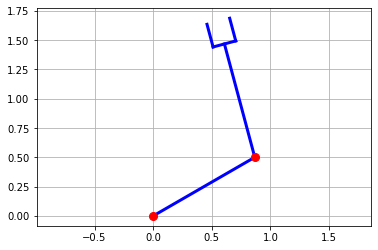

In [10]:
q = [np.deg2rad(30), np.deg2rad(75)]
graph_robot2d(q, L1, L2, show_axis=False)

### 4.&nbsp;Animación del robot RR (local)

Para obtener un movimiento animado del rbot RR se graficará varias configuraciones de manera secuencial. Esta secuencia de configuraciones simulará el movimiento del robot.

El uso de 'qt', que abre una nueva ventana para graficar, funciona solamente en modo local utilizando:
* Cuaderno de Jupyter (local) con Anaconda
* Cuaderno de Jupyter (local) con VSCode. 

Este código NO funciona en Google Colab, ya que Colab no puede abrir una nueva ventana para graficar.

In [11]:
# "qt" realiza el gráfico en una ventana nueva
%matplotlib qt

Al ejecutar el siguiente bucle, se abrirá una nueva ventana donde se visualizará el movimiento del robot.

In [12]:
for i in range(30):
    q = np.array([30+i, 40+0.5*i])    # En grados
    graph_robot2d(np.deg2rad(q), L1, L2)
    plt.pause(0.001)

### 5.&nbsp;Animación del robot RR en Google Colab 

Se utilizará el paquete `Celluloid` que simplifica la creación de animaciones con Matplotlib y Colab (para más información sobre este paquete ver, por ejemplo, [este](https://github.com/ShuaiGuo16/Matplotllib_Animation_Tutorial/blob/master/Tutorial.ipynb) repositorio). Para instalar `Celluloid`, descomentar la siguiente línea y ejecutarla.

In [14]:
#!pip install celluloid --quiet

In [ ]:
from IPython.display import HTML
from celluloid import Camera

Se simulará el movimiento del robot sin graficarlo, almacenando cada "frame" como parte de un video de salida.

In [ ]:
fig = plt.figure()              # También se puede escoger un tamaño más grande con: plt.figure(figsize=(5,4)) 
ax = fig.add_subplot(1, 1, 1)
# Inicializar la cámara de celluloid
camera = Camera(fig)

# Bucle de movimiento
for i in range(30):
    q = np.array([30+i, 40+0.5*i])          # En grados
    graph_robot2d(np.deg2rad(q), L1, L2, ax)
    camera.snap()                           # Almacena el "frame" actual
plt.close()

Luego se mostrará la simulación como un video.

In [ ]:
# Crear la animación
anim = camera.animate(interval = 40, repeat = True, repeat_delay = 500)

# Mostrar el resultado
HTML(anim.to_html5_video())